# Prerequisites

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%run -i "prerequisites.py"
from scipy import optimize

## Powermeters

In [5]:
# powermeter1 = Powermeter('PM100USB', serial='P2003916', unit='dBm', wavelength=1550) 
unit='W'
wavelength=1550
#Charlie powermeters 18/11/20:
PMa = PM('PM100USB', serial='P2007347',unit=unit, wavelength = wavelength)
PMb = PM('PM100USB', serial='P2010371',unit=unit, wavelength = wavelength) 
PMc = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength) 
PMd = PM('PM100USB', serial='P2008115',unit=unit, wavelength = wavelength)
#Alice powermeters 18/11/20:
PMe = PM('PM100USB', serial='P2005653',unit=unit, wavelength = wavelength)
PMf = PM('PM100USB', serial='P2010372',unit=unit, wavelength = wavelength) 
PMg = PM('PM100USB', serial='P2008116',unit=unit, wavelength = wavelength) 
PMh = PM('PM100USB', serial='P2007346',unit=unit, wavelength = wavelength)

## Laser

In [6]:
#laser initialisation and wavelengths
serial_port_name = 'COM12'
mytunics = tunics(serial_port_name = serial_port_name)

p_wavelength = 1549.3
i_wavelength = 1558.98
s_wavelength = 1539.77


Connected to Tunics laser on serial port COM12



### Laser control

In [7]:
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on') 
mytunics.laser_power(8) 

### Laser off

In [8]:
mytunics.laser_switch('off')

# Phase stabilisation functions

In [128]:
def SineSq(x,amp,freq,phi_0,y_off):
    return amp*np.sin(freq*x+phi_0)**2+y_off

def FringeFit(phase):
    Mode1Power=[]
    #x=np.linspace(0, 2*pi, 30)
    #time_fringe_started=time.time()
    for i in range(0,5):
        #phase.append(i*spacing)
        h.set_phase('Phb1', phase[i])
        time.sleep(0.15)
        Mode1Power.append(PMa.measure()*1000000)#times 1000000 bc curvefit doesn't work well with small numbers (micro watts)
    #time with and without starting parameters, does it make it faster? what about limits?
    #time_fringe_finished=int(time.time())
    initial_guess=[max(Mode1Power), 0.5, 0, min(Mode1Power)]
    #print(max(Mode1Power))
    param_bounds=([0, 0.3, -np.inf, 0], [3*max(Mode1Power), 0.8, np.inf, max(Mode1Power)]) # upper bound of amplitude could be given as related to the maximum power when not interfering?
    params, pcov = optimize.curve_fit(SineSq, phase, Mode1Power, bounds = param_bounds, p0 = initial_guess)
    err=np.sqrt(np.diag(pcov))
    return params, err

def FindingOffset():
    h.set_phase('Phb1',0)
    time.sleep(0.1)
    Mode1Power=PMa.measure()
    Mode2Power=PMc.measure()
    
    h.set_phase('Phb1', 0.2)
    time.sleep(0.1)
    Mode1PowerOffset=PMa.measure()
    
    PowerFraction=Mode1Power/(ModePower1+ModePower2)
    ShiftDirection=

## Phase drift with phase stabilisation

In [111]:
mytunics.laser_switch('on')
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_power(5)

In [112]:
h.set_many_phases({'Phb1':0, 'Phb2':0, 'BS1':0, 'BS2':0, 'WDM1':pi, 'Prj_RY1':pi/2+0.23, 'Attb1':pi, 'Attb2':pi, 'MZIb1':pi/2, 'MZIb2':pi, 'MZIb3':pi, 'MZIb4':pi})
#h.set_many_phases({'BS1':pi/2+0.25, 'BS2':0, 'BS3':0, 'WDM1':pi, 'WDM2':0, 'WDM4':pi, 'WDM3':0, 'Prj_RY1':pi+0.23, 'Prj_RY4':pi-0.02, 'Ctr_2':pi, 'Attb1':pi/2-0.25, 'Attb4':pi, 'MZIb1':pi, 'MZIb2':0, 'MZIb3':3*pi/2, 'MZIb4':pi})
withPS_time_array, withoutPS_time_array,Mode1_array,Mode2_array,noPS_arrayMode1,noPS_arrayMode2=[],[],[],[],[],[]
for i in range(0, 10):
    h.set_phase('Phb1', 0)
    time.sleep(0.1)
    withoutPS_time_array.append(time.time())
    noPS_arrayMode1.append(PMa.measure())
    noPS_arrayMode2.append(PMc.measure())
    params,err=FringeFit()
    correction=-params[2]/params[1]
    h.set_phase('Phb1', correction)
    time.sleep(0.1)
    withPS_time_array.append(time.time())
    Mode1_array.append(PMa.measure())
    Mode2_array.append(PMc.measure())
    mean_err=np.mean(err)
    #time.sleep(0.5)
withoutPS_time_array=[x-withoutPS_time_array[0] for x in withoutPS_time_array]
withPS_time_array=[x-withPS_time_array[0] for x in withPS_time_array]
saving_array = np.vstack((withoutPS_time_array, noPS_arrayMode1, noPS_arrayMode2, withPS_time_array, Mode1_array, Mode2_array)).T
np.savetxt(f'Experimental data/Molly testing phase stab 231120/with_and_without_PS_drift_over_time_{int(time.time())}point4_5points.csv', saving_array,delimiter=',', header='#time,without PS output_1, without PS output_2, time, with PS output_1, with PS output_2, 0.1 sleep 0.4 spacing 5 points 5Dbm')


0.049350235506047044
0.038495249196992716
0.015312662249576364
0.003926868701551767
0.01850720693757263
0.018748455532236002
0.0003542329881700378
0.002039912133692962
0.017964068406141113
0.01747213266935252


In [ ]:
#with post selection of low error
h.set_many_phases({'Phb1':0, 'Phb2':0, 'BS1':0, 'BS2':0, 'WDM1':pi, 'Prj_RY1':pi/2+0.23, 'Attb1':pi, 'Attb2':pi, 'MZIb1':pi/2, 'MZIb2':pi, 'MZIb3':pi, 'MZIb4':pi})

withPS_time_array, withoutPS_time_array,Mode1_array,Mode2_array,noPS_arrayMode1,noPS_arrayMode2=[],[],[],[],[],[]
stddev_limit=1
iterations=1000
laser_power=5

mytunics.laser_switch('on')
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_power(laser_power)

spacing=0.5
no_points=5
phase=[]
for i in range(0,no_points):
    phase.append(i*spacing)
    
for i in range(0, iterations):
    params,err=FringeFit(phase)
    mean_err=np.mean(err)
    #print(mean_err)
    
    if mean_err<stddev_limit:
        h.set_phase('Phb1', 0)
        time.sleep(0.1)
        withoutPS_time_array.append(time.time())
        noPS_arrayMode1.append(PMa.measure())
        noPS_arrayMode2.append(PMc.measure())
        
        correction=-params[2]/params[1]
        h.set_phase('Phb1', correction)
        time.sleep(0.1)
        withPS_time_array.append(time.time())
        Mode1_array.append(PMa.measure())
        Mode2_array.append(PMc.measure())
    
    #time.sleep(0.5)
withoutPS_time_array=[x-withoutPS_time_array[0] for x in withoutPS_time_array]
withPS_time_array=[x-withPS_time_array[0] for x in withPS_time_array]

success_rate=100*len(withPS_time_array)/iterations
saving_array = np.vstack((withoutPS_time_array, noPS_arrayMode1, noPS_arrayMode2, withPS_time_array, Mode1_array, Mode2_array)).T
StdDevLim_str=str(stddev_limit).replace('.','-')
file_path=f'Experimental data/Phase stabilisation testing/{no_points}points_spacing04_StdDevLimit{StdDevLim_str}_{int(time.time())}.csv'
np.savetxt(file_path, saving_array,delimiter=',', header=f'time,without PS output_1, without PS output_2, time, with PS output_1, with PS output_2, 0.1s sleep | spacing={spacing} | 5 points | {laser_power}dBm | Std dev limit={stddev_limit} | pass rate={success_rate}%')


## Plotting

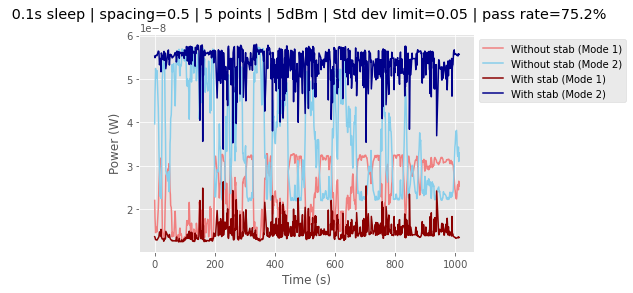

In [189]:
with open(file_path,'r') as f:
    data = list(csv.reader(f,delimiter=','))
info=data[0][-1]
numbers=np.array(data[1:])#array with no table headings (just data)
#print(numbers)
#numbers=np.delete(numbers,np.s_[-1],1) #removing empty final column
numbers=numbers.astype(np.float) #converint all str->float
#print(numbers)
time_without,without1,without2,time_with,with1,with2=numbers[:,0],numbers[:,1],numbers[:,2],numbers[:,3],numbers[:,4],numbers[:,5]
plot1=plt.plot(time_without,without1,color='LightCoral',label='Without stab (Mode 1)')
plot2=plt.plot(time_without,without2,color='SkyBlue',label='Without stab (Mode 2)')
plot3=plt.plot(time_with,with1,color='DarkRed',label='With stab (Mode 1)')
plot4=plt.plot(time_with,with2,color='DarkBlue', label='With stab (Mode 2)')
plt.title(info,y=1.05)
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()